In [623]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [624]:
data=pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [625]:
data.shape

(9240, 37)

In [626]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [627]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## some data validations
1. Prospect ID ,Lead number should unique
2. check for null and missing value, drop column or fill with ,mean or mode
3. some field seems to be optional like occupation which has select as entry that can be removed
4. some fields have missing values like Last Activity


In [628]:
selectValueCols = ['Specialization', 'Lead Source', 'Lead Profile', 'City','How did you hear about X Education']
data[selectValueCols] = data[selectValueCols].replace('Select', np.NaN)

In [629]:
nullValues = []
for col in data.columns.values:
    print("analysis for ",col)
    print("Null values ",data[col].isnull().sum())
    percentageNullValues = (data[col].isnull().sum()/len(data[col]))*100 
    print("Percentage of null values",percentageNullValues)
    if data[col].isnull().sum() > 0 and percentageNullValues > 40:
        nullValues.append(col)
    print("#######################################")
print(nullValues)
print(len(nullValues))

analysis for  Prospect ID
Null values  0
Percentage of null values 0.0
#######################################
analysis for  Lead Number
Null values  0
Percentage of null values 0.0
#######################################
analysis for  Lead Origin
Null values  0
Percentage of null values 0.0
#######################################
analysis for  Lead Source
Null values  36
Percentage of null values 0.38961038961038963
#######################################
analysis for  Do Not Email
Null values  0
Percentage of null values 0.0
#######################################
analysis for  Do Not Call
Null values  0
Percentage of null values 0.0
#######################################
analysis for  Converted
Null values  0
Percentage of null values 0.0
#######################################
analysis for  TotalVisits
Null values  137
Percentage of null values 1.4826839826839828
#######################################
analysis for  Total Time Spent on Website
Null values  0
Percentage of null val

In [630]:
data.drop(nullValues, 
        axis = 1, inplace = True)


In [631]:
len(data.columns)

30

In [632]:
## removing fields like Tags, Last Notable Activity,Last Activity, these value are either too much empty  
## also these value are set after user has been assigned to agent 
data.drop(['Last Notable Activity','Tags','Last Activity'], 
        axis = 1, inplace = True)

In [633]:
len(data.columns)

27

# Categorical variables:

In [634]:
temp_data = (data['Country'].value_counts()/len(data['Country']))*100
temp_data

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [635]:
temp_data = (data['Country'].value_counts()/len(data['Country']))*100
print((data['Country'].isnull().sum()/len(data['Country'])) *100)
temp_data
## 26% null value 70% india value data is not biased
data.drop(['Country'], 
        axis = 1, inplace = True)

26.634199134199132


In [636]:
temp_data = (data['City'].value_counts()/len(data['City']))*100
print(temp_data)
(data['City'].isnull().sum()/len(data['City'])) *100
## 40% data is null or empty, 35% in mumbai , this city data is not helpul can be removed
data.drop(['City'], 
        axis = 1, inplace = True)

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


In [637]:
data.shape

(9240, 25)

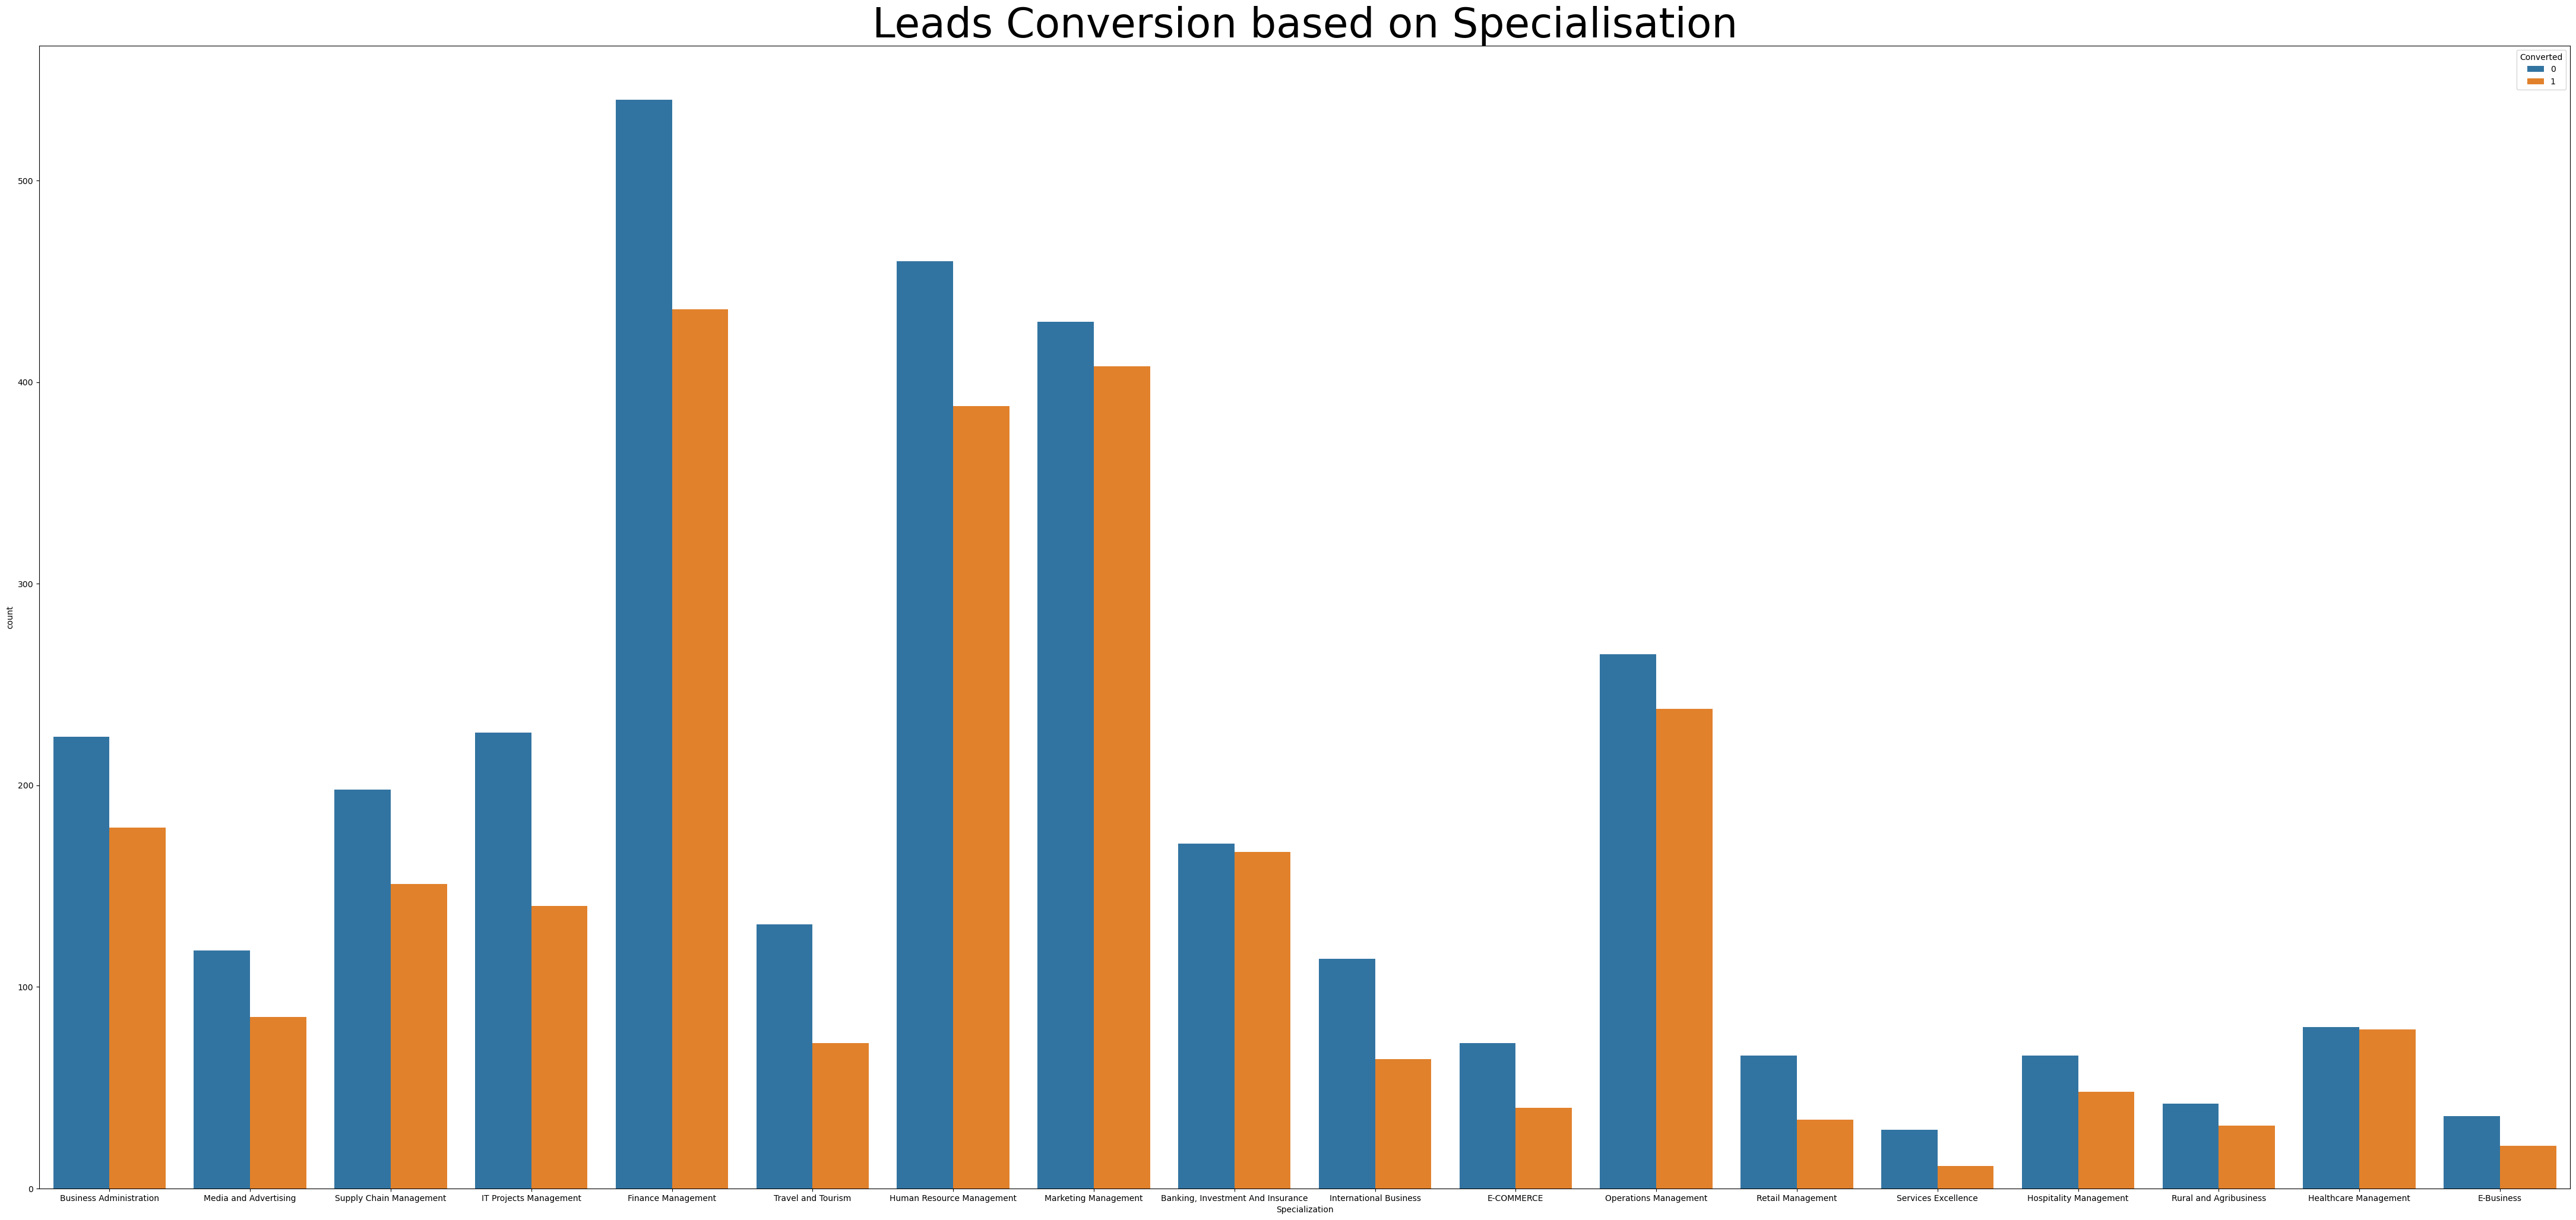

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [638]:
plt.figure(figsize=(55,25))
#Converted vs Specialization
sns.countplot(data, x='Specialization', hue='Converted')
#plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.title("Leads Conversion based on Specialisation",fontsize=50)
plt.show()
(data['Specialization'].value_counts(dropna=False)/len(data['Specialization'])) * 100

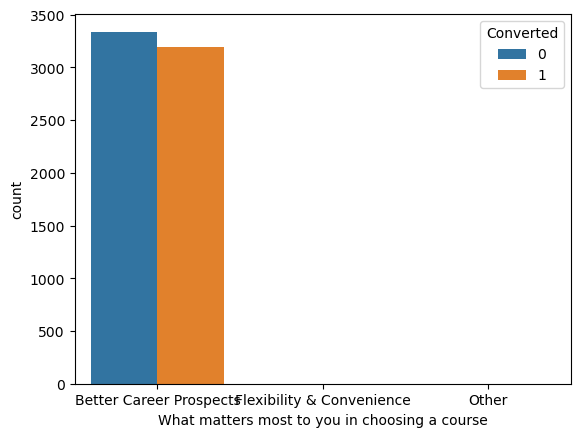

In [639]:
data['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100
#Converted vs Specialization
sns.countplot(data, x='What matters most to you in choosing a course', hue='Converted')
plt.show()

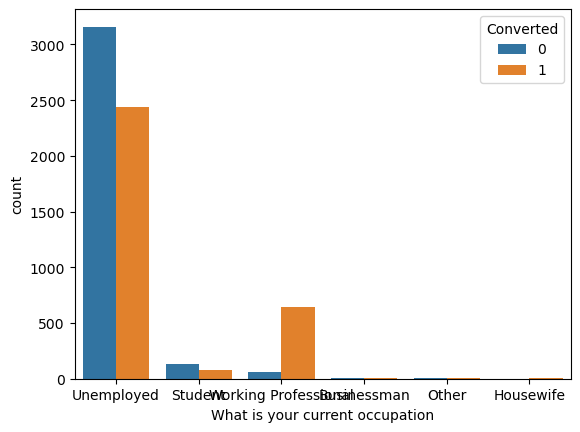

In [640]:
data['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100
#Converted vs Specialization
sns.countplot(data, x='What is your current occupation', hue='Converted')
#plt.title("Leads Conversion based on Specialisation",fontsize=20)
plt.show()

In [641]:
data['Lead Source'].value_counts(dropna=False)


Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

## Binary columns check


In [642]:
# determine unique values
sameValueCols = []
booleanValueCols = []
for key, value in data.select_dtypes(include='object').nunique().to_dict().items():
    print(key,value)
    if(value==1):
        sameValueCols.append(key)
    if(value==2):
        booleanValueCols.append(key)
print(sameValueCols)

Prospect ID 9240
Lead Origin 5
Lead Source 21
Do Not Email 2
Do Not Call 2
Specialization 18
What is your current occupation 6
What matters most to you in choosing a course 3
Search 2
Magazine 1
Newspaper Article 2
X Education Forums 2
Newspaper 2
Digital Advertisement 2
Through Recommendations 2
Receive More Updates About Our Courses 1
Update me on Supply Chain Content 1
Get updates on DM Content 1
I agree to pay the amount through cheque 1
A free copy of Mastering The Interview 2
['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [643]:
#check null values in samevalcolumns
for col in sameValueCols:
    print(col,data[col].isnull().sum()/len(data[col])*100)
#since no null value and all col have same value these can be dropped

Magazine 0.0
Receive More Updates About Our Courses 0.0
Update me on Supply Chain Content 0.0
Get updates on DM Content 0.0
I agree to pay the amount through cheque 0.0


In [644]:
data.drop(sameValueCols, 
        axis = 1, inplace = True)

In [645]:
data.shape

(9240, 20)

In [646]:
# check for data imbalance
booleanValueCols
boolToremove = []
for col in booleanValueCols:
    #print(col,data[col].isnull().sum()/len(data[col])*100)
#     (data[col].value_counts(normalize = True))
    print(col)
    values = (data[col].value_counts(normalize = True) *100).values
    if(abs(values[0]-values[1]) > 90):
        boolToremove.append(col)
#     if((data[col].value_counts(normalize = True)) * 100 > 85):
#         boolToremove.append(col)
boolToremove

Do Not Email
Do Not Call
Search
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
A free copy of Mastering The Interview


['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [647]:
data.drop(boolToremove, 
        axis = 1, inplace = True)

In [648]:
data.shape

(9240, 13)

# numerical analysis

In [649]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

<Axes: xlabel='TotalVisits', ylabel='Count'>

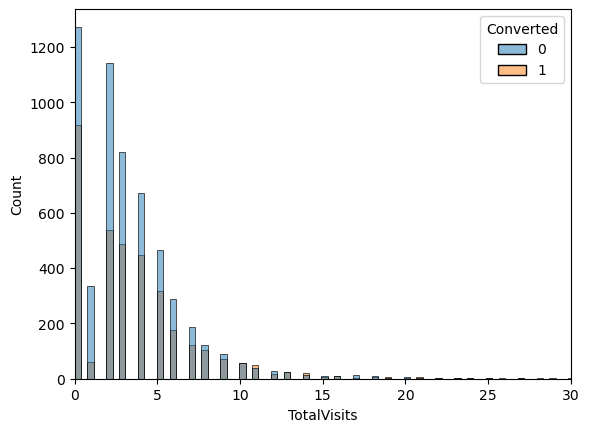

In [650]:
plt.xlim(0, 30)
sns.histplot(data=data, x="TotalVisits", hue="Converted")       

<Axes: xlabel='Total Time Spent on Website', ylabel='Count'>

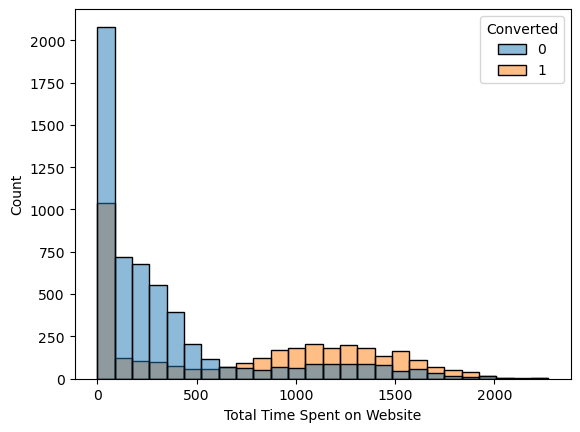

In [651]:
sns.histplot(data=data, x="Total Time Spent on Website", hue="Converted")

<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

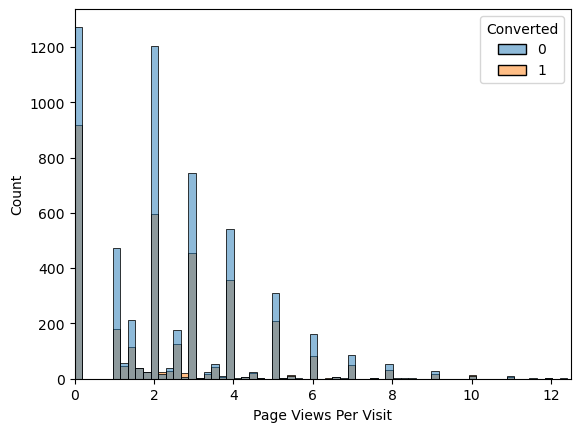

In [652]:
plt.xlim(0, 12.5)
sns.histplot(data=data, x="Page Views Per Visit", hue="Converted")

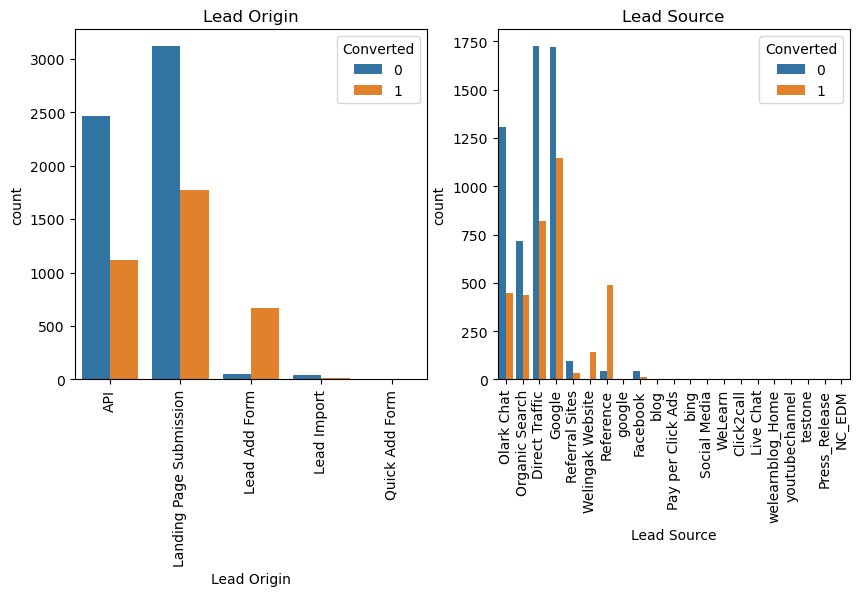

In [653]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

## Outliner check and removal


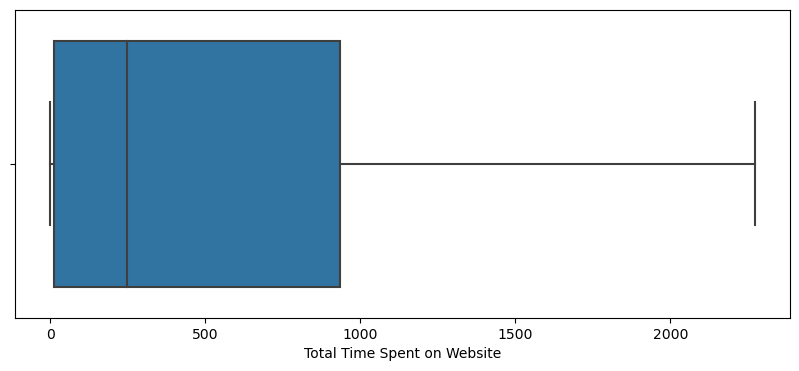

Median 248.0


In [654]:
plt.figure(figsize=(10,4))

sns.boxplot(x=data['Total Time Spent on Website'])


plt.show()

print ('Median', data['Total Time Spent on Website'].median())

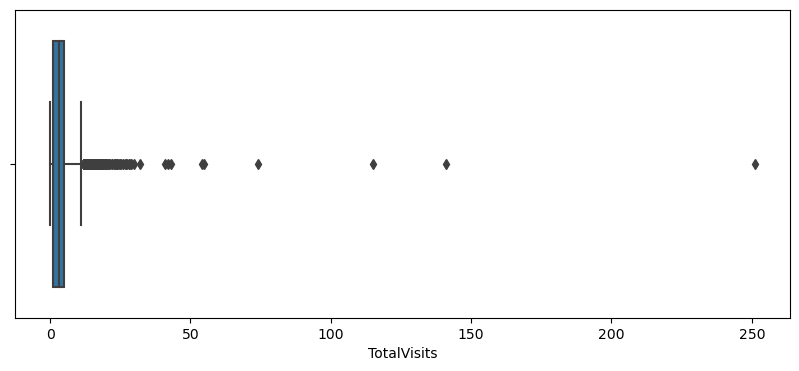

Median 3.0


In [655]:
plt.figure(figsize=(10,4))

sns.boxplot(x=data['TotalVisits'])


plt.show()

print ('Median', data['TotalVisits'].median())

<Axes: xlabel='TotalVisits'>

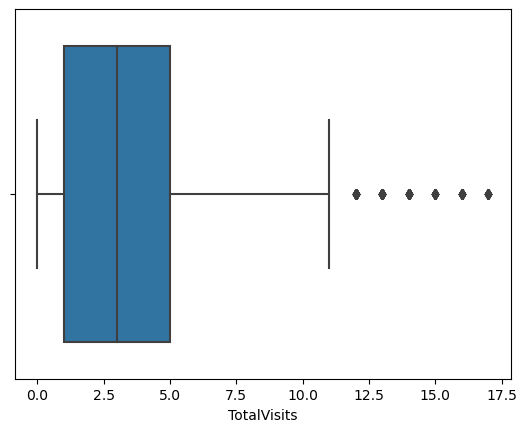

In [656]:
Q3 = data['TotalVisits'].quantile(0.99)
data = data[(data['TotalVisits'] <= Q3)]
Q1 = data['TotalVisits'].quantile(0.01)
data = data[(data['TotalVisits'] >= Q1)]
sns.boxplot(x=data['TotalVisits'])

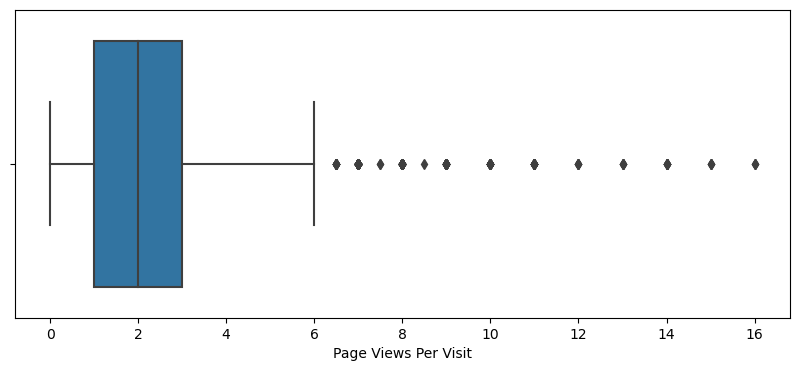

Median 2.0


In [657]:
plt.figure(figsize=(10,4))

sns.boxplot(x=data['Page Views Per Visit'])


plt.show()

print ('Median', data['Page Views Per Visit'].median())

<Axes: xlabel='Page Views Per Visit'>

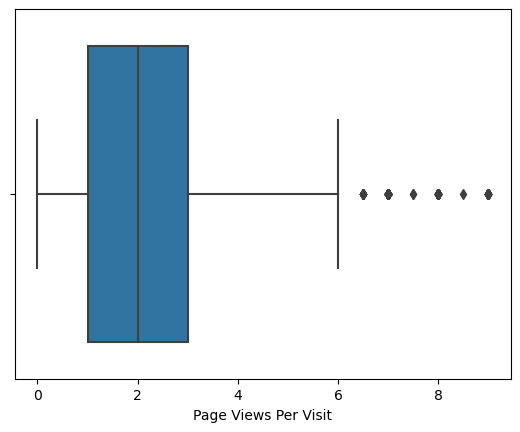

In [658]:
Q3 = data['Page Views Per Visit'].quantile(0.99)

data = data[(data['Page Views Per Visit'] <= Q3)]

Q1 = data['Page Views Per Visit'].quantile(0.01)

data = data[(data['Page Views Per Visit'] >= Q1)]

sns.boxplot(x=data['Page Views Per Visit'])

In [659]:
data.shape
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [660]:
data[['Lead Origin']].value_counts(dropna=False)


Lead Origin            
Landing Page Submission    4769
API                        3546
Lead Add Form               607
Lead Import                  31
dtype: int64

In [661]:
data[['Lead Source']].value_counts(dropna=False)

Lead Source      
Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
dtype: int64

In [662]:
data[['Specialization']].value_counts(dropna=False)

Specialization                   
NaN                                  3284
Finance Management                    945
Human Resource Management             820
Marketing Management                  815
Operations Management                 495
Business Administration               390
IT Projects Management                360
Supply Chain Management               338
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
Healthcare Management                 151
Hospitality Management                107
E-COMMERCE                            107
Retail Management                      95
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
dtype: int64

In [663]:
data[['What is your current occupation']].value_counts(dropna=False)

What is your current occupation
Unemployed                         5410
NaN                                2643
Working Professional                667
Student                             204
Other                                13
Housewife                             9
Businessman                           7
dtype: int64

In [664]:
data.info()

#How did you hear about X Education  
#What matters most to you in choosing a course
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8953 non-null   object 
 1   Lead Number                                    8953 non-null   int64  
 2   Lead Origin                                    8953 non-null   object 
 3   Lead Source                                    8924 non-null   object 
 4   Do Not Email                                   8953 non-null   object 
 5   Converted                                      8953 non-null   int64  
 6   TotalVisits                                    8953 non-null   float64
 7   Total Time Spent on Website                    8953 non-null   int64  
 8   Page Views Per Visit                           8953 non-null   float64
 9   Specialization                                 5669 

In [665]:
data['Do Not Email']=data['Do Not Email'].map(dict(Yes=1, No=0))
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].map(dict(Yes=1, No=0))
data['A free copy of Mastering The Interview'].value_counts()


0    6155
1    2798
Name: A free copy of Mastering The Interview, dtype: int64

In [666]:
# data.drop(['What matters most to you in choosing a course','How did you hear about X Education'], axis = 1, inplace = True)


In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8953 non-null   object 
 1   Lead Number                                    8953 non-null   int64  
 2   Lead Origin                                    8953 non-null   object 
 3   Lead Source                                    8924 non-null   object 
 4   Do Not Email                                   8953 non-null   int64  
 5   Converted                                      8953 non-null   int64  
 6   TotalVisits                                    8953 non-null   float64
 7   Total Time Spent on Website                    8953 non-null   int64  
 8   Page Views Per Visit                           8953 non-null   float64
 9   Specialization                                 5669 

In [667]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Specialization                                   3284
What is your current occupation                  2643
What matters most to you in choosing a course    2661
A free copy of Mastering The Interview              0
dtype: int64

In [668]:
data['Lead Source'].value_counts(dropna=False)
data['Lead Source'].fillna(data['Lead Source'].mode()[0], inplace=True)

In [874]:
data['Specialization'].value_counts(dropna=False)
data['Specialization'] = data['Specialization'].fillna('not provided')


In [875]:

data['What is your current occupation'] = data['What is your current occupation'].fillna('not provided')
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna('not provided')

In [876]:
data['How did you hear about X Education'] = data['How did you hear about X Education'].fillna('not provided')

KeyError: 'How did you hear about X Education'

In [877]:
data.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
dtype: int64

In [878]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8953 non-null   object 
 1   Lead Number                                    8953 non-null   int64  
 2   Lead Origin                                    8953 non-null   object 
 3   Lead Source                                    8953 non-null   object 
 4   Do Not Email                                   8953 non-null   int64  
 5   Converted                                      8953 non-null   int64  
 6   TotalVisits                                    8953 non-null   float64
 7   Total Time Spent on Website                    8953 non-null   int64  
 8   Page Views Per Visit                           8953 non-null   float64
 9   Specialization                                 8953 

In [879]:
## VIF was very high so merging some field , found it after creating once
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Referral Sites','Reference')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','Live Chat',
                                                    'testone','NC_EDM'] ,'Others') 
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Related')
data['Specialization'] = data['Specialization'].replace(['E-Business','International Business'] ,'Business')


In [880]:
data['Lead Source'].value_counts()

Google              2870
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Reference            559
Welingak Website     129
Social Media          33
Others                20
Name: Lead Source, dtype: int64

## Model prepare

## Convert categorical variables into dummy/indicator variables. These dummy variables are binary (0 or 1) variables representing the presence or absence of a particular category in the original variable. This function is particularly useful when you have categorical variables that you want to include in a machine learning model

In [881]:
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation']], drop_first = True)
dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Management_Related',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided'],

In [882]:
print(dummy.isnull().sum())
print(data.isnull().sum())

Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_Social Media                                0
Lead Source_Welingak Website                            0
Specialization_Business                                 0
Specialization_Business Administration                  0
Specialization_E-COMMERCE                               0
Specialization_Management_Related                       0
Specialization_Media and Advertising                    0
Specialization_Rural and Agribusiness                   0
Specialization_Services Excellence                      0
Specialization

In [883]:
data1 = data
data1 = pd.concat([data1, dummy], axis=1)
data1.drop(['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation'], axis = 1, inplace = True)


In [884]:
data1.isnull().sum()

Prospect ID                                             0
Lead Number                                             0
Do Not Email                                            0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
What matters most to you in choosing a course           0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_So

In [885]:
dummy['Lead Origin_Landing Page Submission'].value_counts(dropna=False)

1    4769
0    4184
Name: Lead Origin_Landing Page Submission, dtype: int64

In [886]:
data1['Lead Origin_Landing Page Submission'].value_counts(dropna=False)

1    4769
0    4184
Name: Lead Origin_Landing Page Submission, dtype: int64

In [887]:
data1[data1['Lead Origin_Landing Page Submission'].isnull() == True]

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Management_Related,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided


In [888]:
data[data['Prospect ID'] == 'd93bfdc0-4719-4f0a-ad6b-31070823dfbb']

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
58,d93bfdc0-4719-4f0a-ad6b-31070823dfbb,659942,Landing Page Submission,Organic Search,0,0,17.0,409,8.5,Management_Related,Unemployed,Better Career Prospects,1


In [889]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,not provided,Unemployed,Better Career Prospects,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,not provided,Unemployed,Better Career Prospects,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Business Administration,Student,Better Career Prospects,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Media and Advertising,Unemployed,Better Career Prospects,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,not provided,Unemployed,Better Career Prospects,0


In [890]:
data1.isnull().sum()

Prospect ID                                             0
Lead Number                                             0
Do Not Email                                            0
Converted                                               0
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
What matters most to you in choosing a course           0
A free copy of Mastering The Interview                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Origin_Lead Import                                 0
Lead Source_Google                                      0
Lead Source_Olark Chat                                  0
Lead Source_Organic Search                              0
Lead Source_Others                                      0
Lead Source_Reference                                   0
Lead Source_So

In [891]:
X = data1.drop(['Prospect ID','Lead Number', 'Converted','What matters most to you in choosing a course'], axis=1)


In [892]:
Y = data1['Converted']

In [893]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Specialization_Business,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Management_Related,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [894]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [895]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [896]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Specialization_Business', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Management_Related',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current 

In [897]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, Y_train)

In [898]:
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
print(Zipped_data)
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

[('Do Not Email', True, 1), ('TotalVisits', False, 13), ('Total Time Spent on Website', True, 1), ('Page Views Per Visit', False, 14), ('A free copy of Mastering The Interview', True, 1), ('Lead Origin_Landing Page Submission', True, 1), ('Lead Origin_Lead Add Form', True, 1), ('Lead Origin_Lead Import', True, 1), ('Lead Source_Google', False, 9), ('Lead Source_Olark Chat', True, 1), ('Lead Source_Organic Search', False, 8), ('Lead Source_Others', True, 1), ('Lead Source_Reference', False, 12), ('Lead Source_Social Media', False, 10), ('Lead Source_Welingak Website', True, 1), ('Specialization_Business', False, 11), ('Specialization_Business Administration', False, 6), ('Specialization_E-COMMERCE', False, 15), ('Specialization_Management_Related', False, 5), ('Specialization_Media and Advertising', False, 4), ('Specialization_Rural and Agribusiness', False, 16), ('Specialization_Services Excellence', False, 2), ('Specialization_Travel and Tourism', False, 3), ('Specialization_not provi

Index(['Do Not Email', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Welingak Website',
       'Specialization_not provided',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'What is your current occupation_not provided'],
      dtype='object')

In [899]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2783.6
Date:                Sun, 18 Feb 2024   Deviance:                       5567.2
Time:                        23:40:52   Pearson chi2:                 6.49e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3562
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0798      0.119      0.668      0.504      -0.154       0.314
Do Not Email                                            -1.2483      0.163     -7.645      0.000      -1.568      -0.928
Total Time Spent on Website                              1.0703      0.039     27.537      0.000       0.994       1.146
A free copy of Mastering The Interview                  -0.3188      0.086     -3.700      0.000      -0.488      -0.150
Lead Origin_Landing Page Submission                     -0.6725      0.127     -5.307      0.000      -0.921      -0.424
Lead Origin_Lead Add Form                                3.7440      0.254     14.733      0.000       3.246       4.242
Lead Origin_Lead Import                                  0.5906      0.500      1.182      0.237      -0.389       1.570
Lead Source_Olark Chat                                   0.9211      0.114      8.051      0.000       0.697       1.145
Lead Source_Others                                       0.6158      0.736      0.837      0.403      -0.826       2.058
Lead Source_Welingak Website                             2.6326      1.035      2.543      0.011       0.603       4.662
Specialization_not provided                             -0.9225      0.120     -7.705      0.000      -1.157      -0.688
What is your current occupation_Housewife               22.5425   1.75e+04      0.001      0.999   -3.42e+04    3.42e+04
What is your current occupation_Other                   -0.9098      0.727     -1.252      0.210      -2.334       0.514
What is your current occupation_Student                 -0.3428      0.225     -1.524      0.127      -0.784       0.098
What is your current occupation_Working Professional     2.3962      0.193     12.429      0.000       2.018       2.774
What is your current occupation_not provided            -1.2758      0.085    -15.069      0.000      -1.442      -1.110
========================================================================================================================
"""

##  Variables with high p-values (typically greater than a chosen significance level, such as 0.05) are considered statistically insignificant. This means that there is not enough evidence to reject the null hypothesis that the coefficient of the variable is zero. In other words, these variables are not significantly associated with the target variable.

In [900]:
highPValue = ['Lead Source_Others','What is your current occupation_Student','What is your current occupation_Housewife','What is your current occupation_Other','Lead Origin_Lead Import']
X_train.drop(highPValue,axis = 1, inplace = True)



In [901]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.6
Date:                Sun, 18 Feb 2024   Deviance:                       5545.1
Time:                        23:41:01   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3584
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0713      0.303     -0.235      0.814      -0.666       0.523
Do Not Email                                            -1.2225      0.166     -7.364      0.000      -1.548      -0.897
TotalVisits                                              0.1825      0.048      3.799      0.000       0.088       0.277
Total Time Spent on Website                              1.0589      0.039     27.119      0.000       0.982       1.135
Page Views Per Visit                                    -0.1135      0.055     -2.070      0.038      -0.221      -0.006
A free copy of Mastering The Interview                  -0.2496      0.106     -2.357      0.018      -0.457      -0.042
Lead Origin_Landing Page Submission                     -0.6021      0.131     -4.597      0.000      -0.859      -0.345
Lead Origin_Lead Add Form                                4.2770      0.362     11.810      0.000       3.567       4.987
Lead Source_Google                                       0.1921      0.111      1.732      0.083      -0.025       0.409
Lead Source_Olark Chat                                   1.1457      0.155      7.408      0.000       0.843       1.449
Lead Source_Organic Search                               0.2296      0.126      1.818      0.069      -0.018       0.477
Lead Source_Reference                                   -0.3507      0.308     -1.137      0.256      -0.955       0.254
Lead Source_Social Media                                 0.7368      0.497      1.483      0.138      -0.237       1.711
Lead Source_Welingak Website                             2.3276      1.071      2.174      0.030       0.229       4.426
Specialization_Business                                 -0.2933      0.260     -1.127      0.260      -0.803       0.217
Specialization_Business Administration                  -0.4190      0.238     -1.758      0.079      -0.886       0.048
Specialization_E-COMMERCE                               -0.1980      0.336     -0.590      0.555      -0.856       0.460
Specialization_Management_Related                       -0.4067      0.179     -2.276      0.023      -0.757      -0.056
Specialization_Media and Advertising                    -0.4700      0.273     -1.720      0.085      -1.006       0.066
Specialization_Rural and Agribusiness                   -0.1151      0.398     -0.289      0.772      -0.895       0.665
Specialization_Services Excellence                      -0.7124      0.679     -1.050      0.294      -2.043       0.618
Specialization_Travel and Tourism                       -0.6199      0.297     -2.087      0.037      -1.202      -0.038
Specialization_not provided                             -1

In [902]:
highPValue = ['Lead Source_Google','Lead Source_Reference','Specialization_Business','Specialization_E-COMMERCE',
             'Specialization_Rural and Agribusiness','Specialization_Services Excellence']
X_train.drop(highPValue,axis = 1, inplace = True)

In [903]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2776.7
Date:                Sun, 18 Feb 2024   Deviance:                       5553.4
Time:                        23:42:49   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3576
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0885      0.259     -0.342      0.732      -0.595       0.418
Do Not Email                                            -1.2396      0.164     -7.548      0.000      -1.562      -0.918
TotalVisits                                              0.1832      0.048      3.832      0.000       0.090       0.277
Total Time Spent on Website                              1.0619      0.039     27.232      0.000       0.985       1.138
Page Views Per Visit                                    -0.1087      0.055     -1.992      0.046      -0.216      -0.002
A free copy of Mastering The Interview                  -0.3589      0.088     -4.090      0.000      -0.531      -0.187
Lead Origin_Landing Page Submission                     -0.6113      0.128     -4.762      0.000      -0.863      -0.360
Lead Origin_Lead Add Form                                3.8826      0.263     14.783      0.000       3.368       4.397
Lead Source_Olark Chat                                   1.0315      0.130      7.910      0.000       0.776       1.287
Lead Source_Organic Search                               0.1407      0.108      1.297      0.195      -0.072       0.353
Lead Source_Social Media                                 0.6012      0.490      1.226      0.220      -0.360       1.562
Lead Source_Welingak Website                             2.6103      1.035      2.521      0.012       0.581       4.639
Specialization_Business Administration                  -0.2581      0.199     -1.300      0.193      -0.647       0.131
Specialization_Management_Related                       -0.2469      0.121     -2.047      0.041      -0.483      -0.010
Specialization_Media and Advertising                    -0.2922      0.239     -1.221      0.222      -0.761       0.177
Specialization_Travel and Tourism                       -0.4512      0.265     -1.701      0.089      -0.971       0.069
Specialization_not provided                             -1.1229      0.159     -7.045      0.000      -1.435      -0.811
What is your current occupation_Unemployed               0.3130      0.210      1.492      0.136      -0.098       0.724
What is your current occupation_Working Professional     2.7292      0.280      9.745      0.000       2.180       3.278
What is your current occupation_not provided            -0.9704      0.219     -4.431      0.000      -1.400      -0.541
========================================================================================================================
"""

In [904]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,9.87
5,Lead Origin_Landing Page Submission,6.82
15,Specialization_not provided,6.31
18,What is your current occupation_not provided,5.75
12,Specialization_Management_Related,5.33
3,Page Views Per Visit,2.83
7,Lead Source_Olark Chat,2.80
1,TotalVisits,2.27
4,A free copy of Mastering The Interview,2.25
6,Lead Origin_Lead Add Form,2.15


   ## all VIF are coming below 10
   

In [905]:
y_train_pred = res.predict(X_train_sm)

In [906]:
y_train_pred = y_train_pred.values.reshape(-1)

In [924]:
y_train_pred_final = pd.DataFrame({'converted':Y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = Y_train.index
y_train_pred_final.head()

,converted,converted_prob,Prospect ID
0,1,0.784689,9196
1,0,0.316858,4696
2,0,0.074016,3274
3,0,0.246297,2164
4,1,0.806087,1667


In [926]:
from sklearn import metrics
import math

y_train_pred_final.predicted = y_train_pred_final.converted_prob.map(lambda x:  round(x))
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion_matrix

array([[3455,  427],
       [ 814, 1571]])

In [927]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8019786181586086


In [933]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')


Sensitivity is  65.87 %
Specificity is  89.0 %


In [934]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [938]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )


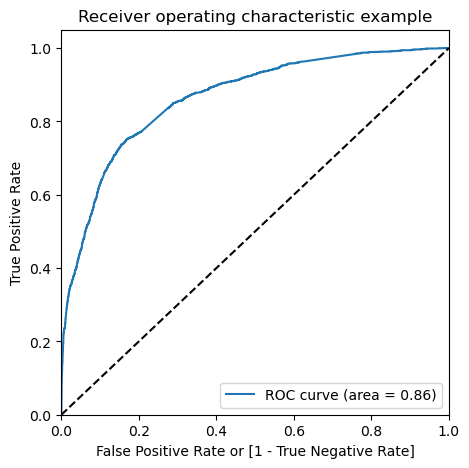

In [939]:

draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

## Finding Optimal Cutoff Point


In [941]:
numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > num else 0)
y_train_pred_final.head()

,converted,converted_prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.784689,9196,1,1,1,1,1,1,1,1,0,0
1,0,0.316858,4696,1,1,1,1,0,0,0,0,0,0
2,0,0.074016,3274,1,0,0,0,0,0,0,0,0,0
3,0,0.246297,2164,1,1,1,0,0,0,0,0,0,0
4,1,0.806087,1667,1,1,1,1,1,1,1,1,1,0


In [951]:
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


pnum = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in pnum:
    temp_cf = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    accuracy = (temp_cf[0,0]+temp_cf[1,1])/sum(sum(temp_cf))
    
    specificity = temp_cf[0,0]/(temp_cf[0,0]+temp_cf[0,1])
    sensitivity = temp_cf[1,1]/(temp_cf[1,0]+temp_cf[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.380565     1.000000     0.000000
0.1   0.1  0.520983     0.985325     0.235703
0.2   0.2  0.698739     0.907757     0.570325
0.3   0.3  0.787299     0.770650     0.797527
0.4   0.4  0.803893     0.719078     0.856002
0.5   0.5  0.801979     0.658700     0.890005
0.6   0.6  0.783788     0.567715     0.916538
0.7   0.7  0.763842     0.466667     0.946419
0.8   0.8  0.740227     0.361845     0.972694
0.9   0.9  0.707037     0.245702     0.990469


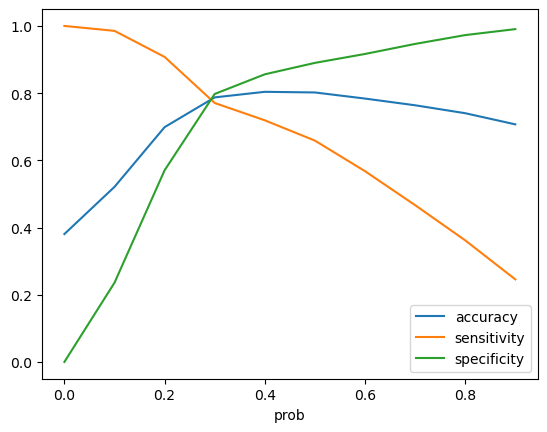

In [954]:
cutoff.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [957]:
y_train_pred_final.predicted = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.35 else 0)
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion_matrix

array([[3234,  648],
       [ 598, 1787]])

In [958]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8011807882559439


In [959]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Sensitivity is  74.93 %
Specificity is  83.31 %


## PREDICTIONS ON TEST SET


In [990]:
 #Scaling numeric values
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
col = X_train.columns
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(Y_test)
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'conversion_prob'})
y_pred_final.head()

,Converted,conversion_prob
0,0,0.121732
1,0,0.137516
2,0,0.010864
3,0,0.121696
4,1,0.132088


In [995]:
y_pred_final['final_predicted'] = y_pred_final.conversion_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,conversion_prob,final_predicted
0,0,0.121732,0
1,0,0.137516,0
2,0,0.010864,0
3,0,0.121696,0
4,1,0.132088,0


In [996]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_matrix

array([[1629,   47],
       [ 664,  346]])

In [997]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7352941176470589

In [998]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')


Sensitivity is  34.26 %
Specificity is  97.2 %
